# Домашнее задание №1

Задание присылать на почту **aleksartamonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать ***AU2018 HW1 <Фамилия Имя>***

soft deadline: 23.02.2018T23:59:00+0300

hard deadline: 02.03.2018T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

*Человек может различать довольно широкий диапазон яркости, хотя в каждый конкретный момент мы можем наблюдать только небольшой кусочек этого диапазона. При смене яркости наши глаза адаптируются к новому освещению. Во-первых, меняется диаметр зрачка. Во-вторых, и это не менее важно, работают колбочки и палочки, которые преобразуют световые раздражения в нервное возбуждение, причем в темноте палочки гораздо чувствительнее.*

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1?

___________________

"Какими свойствами должны обладать коэффициенты aijaij , чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?", - не должно быть линейной зависимости между строками матрицы коэффициентов?

" Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1? ", - не должны превышать единицу каждый (какая-то компонента может лежать вне [0, 1]) сумме единица (иначе уже сумма может лежать вне интервала, скажем, (1, 1, 1))

## Практический блок

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

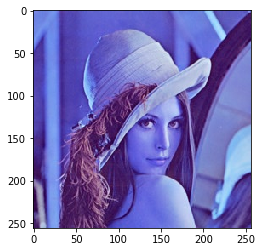

In [2]:
lena = cv2.imread("lena.jpg")
plt.imshow(lena);

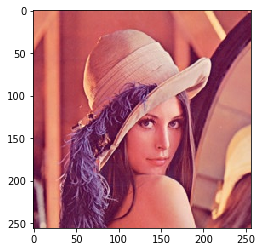

In [3]:
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb);

In [4]:
lena = lena_rgb

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

In [5]:
h, w, c = lena.shape
h, w, c

(256, 256, 3)

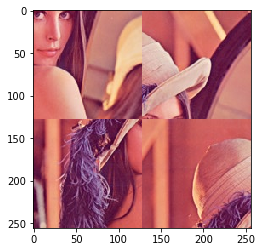

In [6]:
swaped_lena = lena.copy()
swaped_lena[:h//2, :w//2, :] = lena[h//2:, w//2:, :]
swaped_lena[h//2:, w//2:, :] = lena[:h//2, :w//2, :]

plt.imshow(swaped_lena);

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

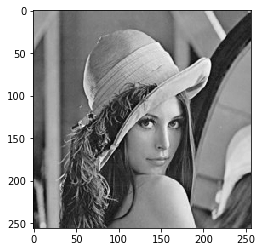

In [7]:
lena_gray_my = np.mean(lena, axis=2)

plt.imshow(lena_gray_my, cmap='gray');

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

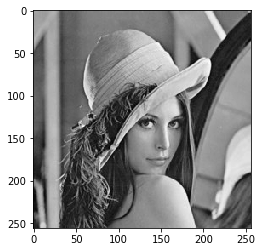

In [8]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
plt.imshow(lena_gray_cvt, cmap='gray');

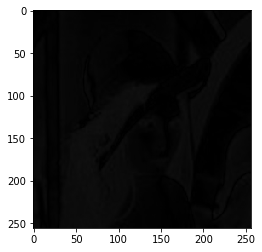

In [9]:
plt.imshow(np.abs(lena_gray_my - lena_gray_cvt), cmap='gray', vmin=0, vmax=255);
# By default, imshow normalizes the data to its min and max

In [10]:
np.abs(lena_gray_my - lena_gray_cvt).max()

16.0

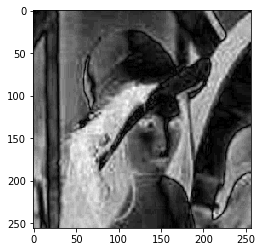

In [11]:
plt.imshow(np.abs(lena_gray_my - lena_gray_cvt), cmap='gray');
# Here we see normalization

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

In [12]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)

In [13]:
lena_hsv[:,:,1] = lena_hsv[:,:,1].max()
lena_hsv[:,:,2] = lena_hsv[:,:,2].max()

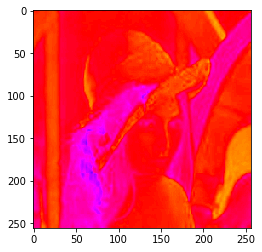

In [14]:
plt.imshow(cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB));

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

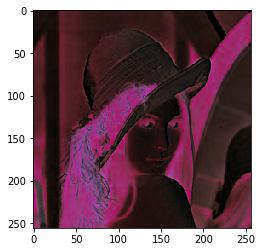

In [15]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:,:,2] = 255 - lena_hsv[:,:,2]
plt.imshow(cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB));

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

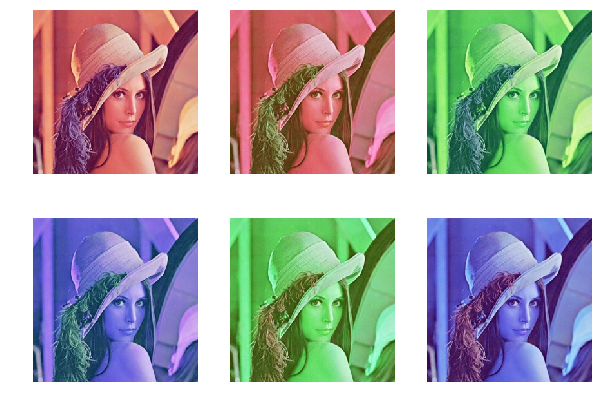

In [16]:
from itertools import permutations

nrows = 2
ncols = 3

f, axs = plt.subplots(nrows, ncols, figsize=(10,7))

for i, p in zip(range(1, 7), permutations([0, 1, 2])):
    lena_tmp = np.zeros_like(lena)
    
    for j in range(3):
        lena_tmp[:, :, j] = lena[:, :, p[j]]
    
    plt.subplot(nrows, ncols, i)
    plt.imshow(lena_tmp);
    plt.axis('off')


##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [17]:
lena_lab_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2Lab)